# Individual Vehivle Approvals (IVA)

## Data

- https://www.eea.europa.eu/en/datahub/datahubitem-view/9636827c-bd0c-40f5-814e-c4065c11c9a0
- API explorer: https://discodata.eea.europa.eu/#
- Goes back to 2012 in various formats


In [140]:
import pandas as pd
import json
import urllib.request
import urllib.parse
import os.path
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker

In [52]:
# years = [2017, 2018, 2019, 2020, 2021, 2022, 2023]
years = [
    {"year": 2020, "table": "2020Fv18"},
    {"year": 2021, "table": "2021Fv20"},
    {"year": 2022, "table": "2022Fv22"},
    {"year": 2023, "table": "2023Pv23"}
  ]
api_base = "https://discodata.eea.europa.eu/sql"

In [53]:
# Recent years are available via SQL, so we'll pull those
# and cache the data to "./data/registrations_{year}.json"
# Everything else is in giant static CSV dumps

for el in years:
	outputPath = f"./data/registrations_{el['year']}.json"
	if (os.path.isfile(outputPath)):
		print(f"Found cached data for {el['year']}, skipping")
		continue
	query = f"SELECT * FROM [CO2Emission].[latest].[co2vans_{el['table']}] WHERE Mh = 'AA-IVA'"
	url = f"{api_base}?query={urllib.parse.quote_plus(query)}"
	print(f"Fetching data for {el['year']} from {url}")
	with urllib.request.urlopen(url) as data:
		json_data = json.load(data)
		with open(outputPath, 'w') as f:
			json.dump(json_data, f)

Fetching data for 2020 from https://discodata.eea.europa.eu/sql?query=SELECT+%2A+FROM+%5BCO2Emission%5D.%5Blatest%5D.%5Bco2vans_2020Fv18%5D+WHERE+Mh+%3D+%27AA-IVA%27
Fetching data for 2021 from https://discodata.eea.europa.eu/sql?query=SELECT+%2A+FROM+%5BCO2Emission%5D.%5Blatest%5D.%5Bco2vans_2021Fv20%5D+WHERE+Mh+%3D+%27AA-IVA%27
Fetching data for 2022 from https://discodata.eea.europa.eu/sql?query=SELECT+%2A+FROM+%5BCO2Emission%5D.%5Blatest%5D.%5Bco2vans_2022Fv22%5D+WHERE+Mh+%3D+%27AA-IVA%27
Fetching data for 2023 from https://discodata.eea.europa.eu/sql?query=SELECT+%2A+FROM+%5BCO2Emission%5D.%5Blatest%5D.%5Bco2vans_2023Pv23%5D+WHERE+Mh+%3D+%27AA-IVA%27


In [152]:
# Load cached data from "./data/registrations_{year}.json"
merged_data = pd.DataFrame()
for el in years:
	with open(f"./data/registrations_{el['year']}.json") as f:
		js = json.load(f)
		df = pd.DataFrame(pd.json_normalize(js, record_path="results"))
		merged_data = pd.concat([merged_data, df], ignore_index=True)

C:\Users\max\AppData\Local\Temp\ipykernel_21808\3704853231.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_data = pd.concat([merged_data, df], ignore_index=True)
C:\Users\max\AppData\Local\Temp\ipykernel_21808\3704853231.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  merged_data = pd.concat([merged_data, df], ignore_index=True)
C:\Users\max\AppData\Local\Temp\ipykernel_21808\3704853231.py:7: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is de

In [155]:
merged_data = (merged_data
	.astype({"year": int})
	.rename(columns={"MS": "country"}))

dodges = merged_data.loc[
    (merged_data["Mk"] == "DODGE")
    & (merged_data["T"].str.contains("RAM"))
    & (merged_data["country"] == "DE")
].sort_values("year")

counts = dodges["year"].value_counts().sort_index()


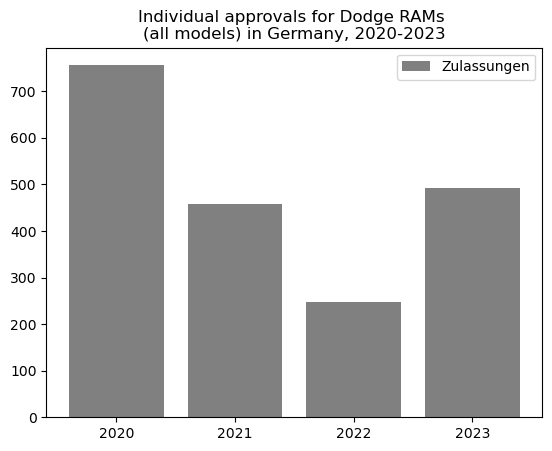

In [159]:
fig,ax = plt.subplots()

ax.set_title("IVA Registrations for Dodge RAMs \n(all models) in Germany, 2020-2023")
ax.bar(
	x=counts.index,
	height=counts.values,
	label="Zulassungen",
	color="gray"
)
plt.gca().xaxis.set_major_locator(mticker.MultipleLocator(1))
ax.legend()
